<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n20.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.286767,98.612923,78.106662,-0.000469,218.005884,218.006873,-0.000989
1,0.0,1.0,78.616846,51.967995,32.971571,-0.002262,173.554150,173.556004,-0.001854
2,0.0,2.0,36.232771,73.766316,90.327110,0.000708,210.326905,210.326920,-0.000016
3,0.0,3.0,73.957366,49.206711,67.651998,0.000550,200.816624,200.816144,0.000480
4,0.0,4.0,59.161583,23.331653,35.035204,-0.006833,127.521607,127.528474,-0.006868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,64.521240,54.749573,86.957506,-0.000314,216.228004,216.228412,-0.000407
59996,999.0,56.0,69.802068,68.739229,49.025971,-0.000786,197.566482,197.567627,-0.001145
59997,999.0,57.0,22.054609,77.400560,78.218683,-0.002339,187.671513,187.672917,-0.001404
59998,999.0,58.0,71.155330,23.836045,78.825443,-0.002721,183.814096,183.817385,-0.003289


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.286767,98.612923,78.106662,-0.000469,218.005884,218.006873,-0.000989
1,0.0,1.0,78.616846,51.967995,32.971571,-0.002262,173.554150,173.556004,-0.001854
2,0.0,2.0,36.232771,73.766316,90.327110,0.000708,210.326905,210.326920,-0.000016
3,0.0,3.0,73.957366,49.206711,67.651998,0.000550,200.816624,200.816144,0.000480
4,0.0,4.0,59.161583,23.331653,35.035204,-0.006833,127.521607,127.528474,-0.006868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,64.521240,54.749573,86.957506,-0.000314,216.228004,216.228412,-0.000407
59996,999.0,56.0,69.802068,68.739229,49.025971,-0.000786,197.566482,197.567627,-0.001145
59997,999.0,57.0,22.054609,77.400560,78.218683,-0.002339,187.671513,187.672917,-0.001404
59998,999.0,58.0,71.155330,23.836045,78.825443,-0.002721,183.814096,183.817385,-0.003289


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.286767,98.612923,78.106662,-0.000469,218.005884,218.006873,-0.000989
1,0.0,1.0,78.616846,51.967995,32.971571,-0.002262,173.554150,173.556004,-0.001854
2,0.0,2.0,36.232771,73.766316,90.327110,0.000708,210.326905,210.326920,-0.000016
3,0.0,3.0,73.957366,49.206711,67.651998,0.000550,200.816624,200.816144,0.000480
4,0.0,4.0,59.161583,23.331653,35.035204,-0.006833,127.521607,127.528474,-0.006868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,64.521240,54.749573,86.957506,-0.000314,216.228004,216.228412,-0.000407
59996,999.0,56.0,69.802068,68.739229,49.025971,-0.000786,197.566482,197.567627,-0.001145
59997,999.0,57.0,22.054609,77.400560,78.218683,-0.002339,187.671513,187.672917,-0.001404
59998,999.0,58.0,71.155330,23.836045,78.825443,-0.002721,183.814096,183.817385,-0.003289


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    31.286767  98.612923  78.106662  ...  218.005884  218.006873 -0.000989
      1.0    78.616846  51.967995  32.971571  ...  173.554150  173.556004 -0.001854
      2.0    36.232771  73.766316  90.327110  ...  210.326905  210.326920 -0.000016
      3.0    73.957366  49.206711  67.651998  ...  200.816624  200.816144  0.000480
      4.0    59.161583  23.331653  35.035204  ...  127.521607  127.528474 -0.006868
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   64.521240  54.749573  86.957506  ...  216.228004  216.228412 -0.000407
      56.0   69.802068  68.739229  49.025971  ...  197.566482  197.567627 -0.001145
      57.0   22.054609  77.400560  78.218683  ...  187.671513  187.672917 -0.001404
      58.0   71.155330  23.836045  78.825443  ...  183.814096  183.817385 -0.003289
      59.0   87.311293  93.173331  83.272423  ...  273.756236  273.757302 -0.001066

[60000 rows x 7 columns]

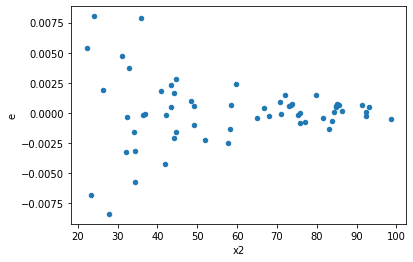

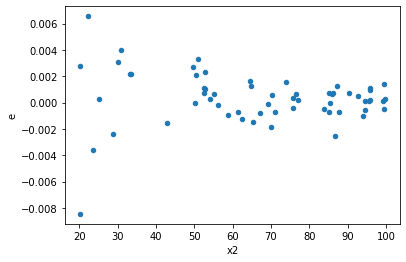

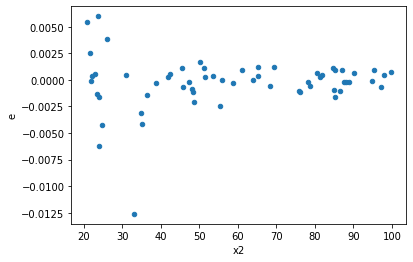

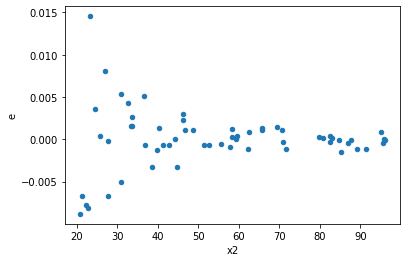

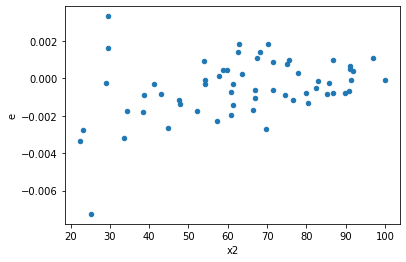

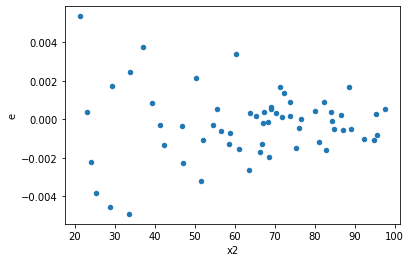

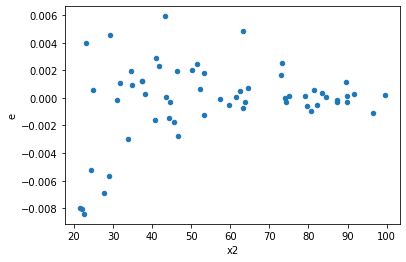

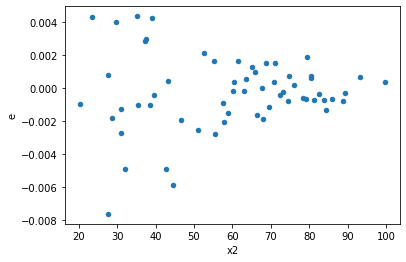

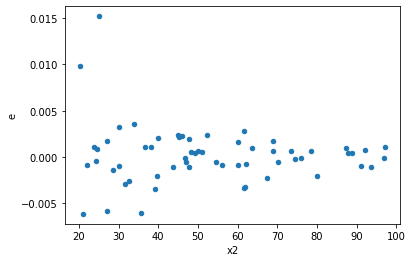

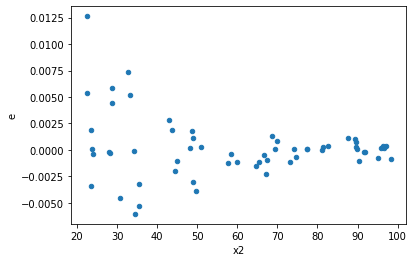

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,8.472736136349729e-06,0.0003955901105397893,4.2363680681748643e-07,1.9779505526989466e-05,0.02141796751387071,7.146971059858891e-13,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,1.736360220511542e-05,0.00015874093696966395,8.681801102557711e-07,7.937046848483198e-06,0.10938326645025206,4.027660426822127e-06,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1.3235284458275488e-05,0.00022543552738676898,6.617642229137745e-07,1.127177636933845e-05,0.0587098431720052,1.4276245708827169e-08,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,1.2606972555551146e-05,0.0006158851442326734,6.303486277775573e-07,3.079425721163367e-05,0.020469681195603568,4.522102209487649e-13,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,1.3686170283296931e-05,8.73661964066774e-05,6.843085141648465e-07,4.36830982033387e-06,0.15665292580198556,7.91944180244241e-05,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,1.777164386405817e-05,0.00014590382578189094,8.885821932029085e-07,7.295191289094547e-06,0.12180382364081863,1.008185909954654e-05,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,2.6486844233352463e-05,0.0002474723775052688,1.3243422116676232e-06,1.237361887526344e-05,0.10702949759630667,3.3374057547802575e-06,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1.9653609879896137e-05,0.00026245376955627813,9.82680493994807e-07,1.3122688477813907e-05,0.07488408306393862,1.3758106541668236e-07,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,5.1362600859562884e-05,0.00047219757063292215,2.5681300429781443e-06,2.3609878531646107e-05,0.10877353898860112,3.838009814858833e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64